# Star Wars Survey

While waiting for Star Wars: [The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](http://fivethirtyeight.com/) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In this Project we are going to be cleaning and exploring the data set.

## Reading the data

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
#dropping first row as it description on column in the survey
star_wars = star_wars.iloc[1:]
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The data has several columns, including:

* <mark>RespondentID</mark> - An anonymized ID for the respondent (person taking the survey)
* <mark>Gender</mark> - The respondent's gender
* <mark>Age</mark> - The respondent's age
* <mark>Household Income</mark> - The respondent's income
* <mark>Education</mark> - The respondent's education level
* <mark>Location (Census Region)</mark> - The respondent's location
* <mark>Have you seen any of the 6 films in the Star Wars franchise?</mark> - Has a Yes or No response
* <mark>Do you consider yourself to be a fan of the Star Wars film franchise?</mark> - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First we will start with removing the invalid rows. For example, <mark>RespondentID</mark> is supposed to be a unique ID for each respondent, but it's blank in some rows.

## Cleaning and Mapping Yes/No Columns

The next two columns, which are:

* <mark>Have you seen any of the 6 films in the Star Wars franchise?</mark>
* <mark>Do you consider yourself to be a fan of the Star Wars film franchise?</mark>

Both represent Yes/No questions. They can also be NaN where a respondent chooses not to answer a question.

Both columns are currently string types, because the main values they contain are <mark>Yes</mark> and <mark>No</mark>. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values <mark>True</mark>, <mark>False</mark>, and <mark>NaN</mark>.

In [2]:
#yes no map
yes_no = {"Yes": True,"No": False}

#converting columns
cols=["Have you seen any of the 6 films in the Star Wars franchise?",
      "Do you consider yourself to be a fan of the Star Wars film franchise?"]

for c in cols:
    star_wars[c] = star_wars[c].map(yes_no)

#checking the values
for c in cols:
    print(star_wars[c].value_counts(dropna=False),"\n")


True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64 



## Cleaning and Mapping Checkbox Columns
The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

* <mark>Which of the following Star Wars films have you seen? Please select all that apply.</mark> - Whether or not the respondent saw <mark>Star Wars: Episode I The Phantom Menace.</mark>
* <mark>Unnamed: 4</mark> - Whether or not the respondent saw <mark>Star Wars: Episode II Attack of the Clones.</mark>
* <mark>Unnamed: 5</mark> - Whether or not the respondent saw <mark>Star Wars: Episode III Revenge of the Sith.</mark>
* <mark>Unnamed: 6</mark> - Whether or not the respondent saw <mark>Star Wars: Episode IV A New Hope.</mark>
* <mark>Unnamed: 7</mark> - Whether or not the respondent saw <mark>Star Wars: Episode V The Empire Strikes Back.</mark>
* <mark>Unnamed: 8</mark> - Whether or not the respondent saw <mark>Star Wars: Episode VI Return of the Jedi.</mark>

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is <mark>NaN</mark>, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

In [3]:
#import needed library
import numpy as np
#movie map
movie_map= {"Star Wars: Episode I  The Phantom Menace": True,
            "Star Wars: Episode II  Attack of the Clones": True,
            "Star Wars: Episode III  Revenge of the Sith": True,
            "Star Wars: Episode IV  A New Hope": True,
            "Star Wars: Episode V The Empire Strikes Back": True,
            "Star Wars: Episode VI Return of the Jedi": True,
            np.nan: False}
#map our movies
for c in star_wars.columns[3:9]:
    star_wars[c]=star_wars[c].map(movie_map)
#renamming movie columns
star_wars=star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"})
#checking our changes
for c in star_wars.columns[3:9]:
    print(star_wars[c].value_counts(dropna=False),"\n")

True     673
False    513
Name: seen_1, dtype: int64 

False    615
True     571
Name: seen_2, dtype: int64 

False    636
True     550
Name: seen_3, dtype: int64 

True     607
False    579
Name: seen_4, dtype: int64 

True     758
False    428
Name: seen_5, dtype: int64 

True     738
False    448
Name: seen_6, dtype: int64 



## Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value <mark>1</mark>, <mark>2</mark>, <mark>3</mark>, <mark>4</mark>, <mark>5</mark>, <mark>6</mark>, or <mark>NaN</mark>:

* <mark>Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.</mark> - How much the respondent liked <mark>Star Wars: Episode I The Phantom Menace</mark>
* Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
* <mark>Unnamed: 11</mark> - How much the respondent liked <mark>Star Wars: Episode III Revenge of the Sith</mark>
* <mark>Unnamed: 12</mark> - How much the respondent liked <mark>Star Wars: Episode IV A New Hope</mark>
* <mark>Unnamed: 13</mark> - How much the respondent liked <mark>Star Wars: Episode V The Empire Strikes Back</mark>
* <mark>Unnamed: 14</mark> - How much the respondent liked <mark>Star Wars: Episode VI Return of the Jedi</mark>

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [4]:
#convert columns to numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
#renamming ranking columns
star_wars=star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"})
#checking our changes
for c in star_wars.columns[9:15]:
    print(star_wars[c].value_counts(dropna=False),"\n")    

NaN     351
 4.0    237
 6.0    168
 3.0    130
 1.0    129
 5.0    100
 2.0     71
Name: ranking_1, dtype: int64 

NaN     350
 5.0    300
 4.0    183
 2.0    116
 3.0    103
 6.0    102
 1.0     32
Name: ranking_2, dtype: int64 

NaN     351
 6.0    217
 5.0    203
 4.0    182
 3.0    150
 2.0     47
 1.0     36
Name: ranking_3, dtype: int64 

NaN     350
 1.0    204
 6.0    161
 2.0    135
 4.0    130
 3.0    127
 5.0     79
Name: ranking_4, dtype: int64 

NaN     350
 1.0    289
 2.0    235
 5.0    118
 3.0    106
 4.0     47
 6.0     41
Name: ranking_5, dtype: int64 

NaN     350
 2.0    232
 3.0    220
 1.0    146
 6.0    145
 4.0     57
 5.0     36
Name: ranking_6, dtype: int64 



In [5]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

### Checkpoint 
At this point we cleaned most of the columns using different approaches, in order to maked driving insights out of the data easier and faster.

we will start with the highest ranking movie and how they compare to each other.

## Finding the Highest-Ranked Movie
Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly.

In [6]:
#import plotting library
%matplotlib inline
import matplotlib.pyplot as plt

<Container object of 6 artists>

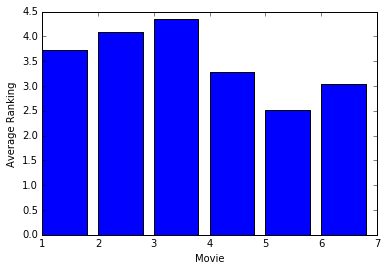

In [7]:
#plotting mean ratings
movie_ratings=star_wars[star_wars.columns[9:15]].mean()
plt.xlabel("Movie")
plt.ylabel('Average Ranking')
plt.bar(range(1,7),movie_ratings)

it seems like original movies(4-6) were ranked higher than the recent ones(1-3).

where 1 is the highest rating.

## Finding the Most Viewed Movie

let's see the viewings of the movies across the sequels of Star Wars.

<Container object of 6 artists>

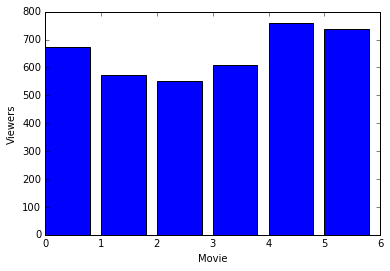

In [9]:
total_views=star_wars[star_wars.columns[3:9]].sum()
plt.xlabel("Movie")
plt.ylabel('Viewers')
plt.bar(range(6),total_views)

It appears that the original movies(4-6) were seen by more respondents than the newer movies. This align with that earlier movies seem to be more well rated as well as being the most popular.

## Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

* <mark>Do you consider yourself to be a fan of the Star Wars film franchise?</mark> - True or False
* <mark>Do you consider yourself to be a fan of the Star Trek franchise?</mark> - Yes or No
* <mark>Gender</mark> - Male or Female

We can split a dataframe into two groups based on a binary column by creating two subsets.

The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

### Gender 
We will split our dataset with gender as our segment and compare the results between the different segments.

In [10]:
# Split according to gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

#### Highest-ranked across segments

<Container object of 6 artists>

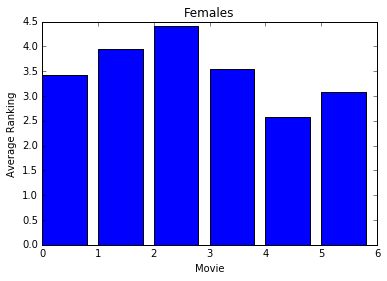

In [20]:
female_ratings=females[females.columns[9:15]].mean()
plt.title("Females")
plt.xlabel("Movie")
plt.ylabel('Average Ranking')
plt.bar(range(6),female_ratings)

<Container object of 6 artists>

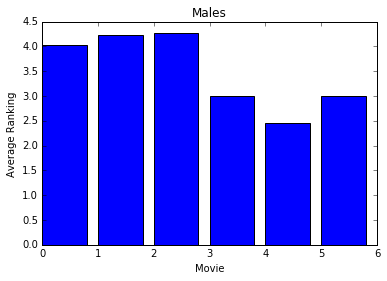

In [21]:
male_ratings=males[males.columns[9:15]].mean()
plt.title("Males")
plt.xlabel("Movie")
plt.ylabel('Average Ranking')
plt.bar(range(6),male_ratings)

Both genders liked original movies(4-6) more than the recent ones(1-3).

where 1 is the highest rating.

#### Views across segments

<Container object of 6 artists>

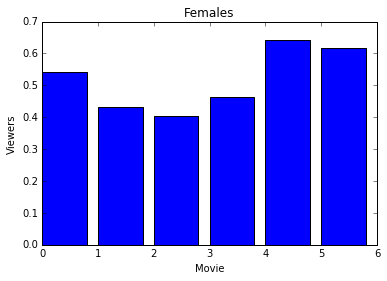

In [24]:
female_viewers=females[females.columns[3:9]].mean()
plt.title("Females")
plt.xlabel("Movie")
plt.ylabel('Viewers')
plt.bar(range(6),female_viewers)

<Container object of 6 artists>

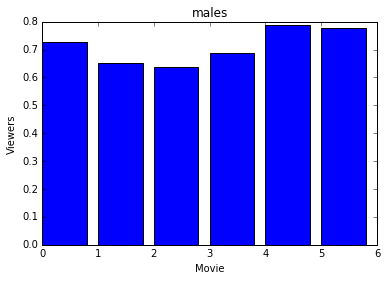

In [25]:
male_viewers=males[males.columns[3:9]].mean()
plt.title("males")
plt.xlabel("Movie")
plt.ylabel('Viewers')
plt.bar(range(6),male_viewers)

Males watch Star Wars movies more frequently than females, but they tend to be more tough critcs on the movies with lower ratings especially for newer movies (1-3) 

## More can be revealed

More can be done to explore our dataset

Some potential next steps:

* Segmenting the data based on columns like <mark>Education</mark>, <mark>Location (Census Region)</mark>, and <mark>Which character shot first?</mark>, which aren't binary.
* Cleaning up remaining columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
    * Which character do respondents like the most?
    * Which character do respondents dislike the most?
    * Which character is the most controversial (split between likes and dislikes)?
    
revealing more about Star Wars audience, which can help in the upcoming editions. 